In [20]:
import sys
sys.path.insert(0, "../")

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow.keras as keras

import pprint
from qkeras import QActivation
from qkeras import QDense
from qkeras import quantizers
from qkeras.qtools import run_qtools
from qkeras.qtools import settings as qtools_settings

In [152]:
from graphUtil import *

m = '../V11/signal/nElinks_5/Nov10_8x8_c8_S2_qK_RTL/encoder_Nov10_8x8_c8_S2_qK_RTL.json'
weights_path = '../V11/signal/nElinks_5/Nov10_8x8_c8_S2_qK_RTL/encoder_Nov10_8x8_c8_S2_qK_RTL.hdf5'

encoder = loadModel(m)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [4]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 1)]         0         
_________________________________________________________________
input_qa (QActivation)       (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_0_m (QConv2D)         (None, 4, 4, 8)           80        
_________________________________________________________________
accum1_qa (QActivation)      (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
encoded_vector (QDense)      (None, 16)                2064      
_________________________________________________________________
encod_qa (QActivation)       (None, 16)                0   

In [183]:
def get_reference_profile(reference_internal,reference_accumulator):
#     reference_internal = "fp32"
    #     reference_accumulator = "fp32"

    q = run_qtools.QTools(
      encoder,
      # energy calculation using a given process
      process="horowitz",
      # quantizers for model input
      source_quantizers=[quantizers.quantized_bits(8, 0, 1)],
      is_inference=False,
      # absolute path (including filename) of the model weights
      weights_path=weights_path,
      # keras_quantizer to quantize weight/bias in un-quantized keras layers
      keras_quantizer=reference_internal,
      # keras_quantizer to quantize MAC in un-quantized keras layers
      keras_accumulator=reference_accumulator,
      # whether calculate baseline energy
      for_reference=True)

    q.qtools_stats_print()

    # dump the layer data map to a json file
    # json_name = "qtool_stat.json"
    # q.qtools_stats_to_json(json_name)

    # caculate energy of the derived data type map.
    ref_energy_dict = q.pe(
      # whether to store parameters in dram, sram, or fixed
      weights_on_memory="sram",
      # store activations in dram or sram
      activations_on_memory="sram",
      # minimum sram size in number of bits
      min_sram_size=8*16*1024*1024,
      # whether load data from dram to sram (consider sram as a cache
      # for dram. If false, we will assume data will be already in SRAM
      rd_wr_on_io=False)


    # get stats of energy distribution in each layer
    reference_energy_profile = q.extract_energy_profile(
                                      qtools_settings.cfg.include_energy,
                                      ref_energy_dict)
    # reference_energy_profile_fp32 = qfp32.extract_energy_profile(
    #                                   qtools_settings.cfg.include_energy,
    #                                   ref_energy_dict)

    # extract sum of energy of each layer according to the rule specified in
    # qtools_settings.cfg.include_energy
    # total_reference_energy = q.extract_energy_sum(
    #                           qtools_settings.cfg.include_energy,
    #                         ref_energy_dict)
    # pprint.pprint(reference_energy_profile)
    # print("Total baseline energy:", total_reference_energy)
    
    return reference_energy_profile

In [184]:
reference_energy_profile_fp16 = get_reference_profile('fp16','fp16')
reference_energy_profile_fp32 = get_reference_profile('fp32','fp32')

{
    "source_quantizers": [
        {
            "quantizer_type": "quantized_bits",
            "bits": 8,
            "int_bits": 0,
            "is_signed": true
        }
    ],
    "input_qa": {
        "layer_type": "QActivation",
        "input_quantizer_list": [
            {
                "quantizer_type": "quantized_bits",
                "bits": 8,
                "int_bits": 0,
                "is_signed": true
            }
        ],
        "output_quantizer": {
            "quantizer_type": "floating_point",
            "bits": 16,
            "shape": [
                -1,
                8,
                8,
                1
            ]
        },
        "operation_count": 64
    },
    "conv2d_0_m": {
        "layer_type": "QConv2D",
        "input_quantizer_list": [
            {
                "quantizer_type": "floating_point",
                "bits": 16
            }
        ],
        "weight_quantizer": {
            "quantizer_type": "floating_point"

In [167]:
# By setting for_reference=False, we quantize the model using quantizers
# specified by users in qkeras layers. For hybrid models where there are
# mixture of unquantized keras layers and quantized qkeras layers, we use
# keras_quantizer to quantize weights/bias and keras_accumulator to quantize
# MAC variables for all keras layers.
q = run_qtools.QTools(
                      encoder,
                      process="horowitz",
                      source_quantizers=[quantizers.quantized_bits(8, 0, 1)],
                      is_inference=False,
                      weights_path=weights_path,
                      keras_quantizer=reference_internal,
                      keras_accumulator=reference_accumulator,
                      for_reference=False)
trial_energy_dict = q.pe(
                      weights_on_memory="sram",
                      activations_on_memory="sram",
                      min_sram_size=8*16*1024*1024,
                      rd_wr_on_io=False)
trial_energy_profile = q.extract_energy_profile(
                        qtools_settings.cfg.include_energy,
                        trial_energy_dict)
total_trial_energy = q.extract_energy_sum(
                          qtools_settings.cfg.include_energy,
                        trial_energy_dict)
print("energy profile:")
pprint.pprint(trial_energy_profile)
print("Total energy:", total_trial_energy)

energy profile:
{'accum1_qa': {'energy': {'inputs': 136.94,
                          'op_cost': 0.0,
                          'outputs': 60.86,
                          'parameters': 0.0},
               'total': 60.86},
 'conv2d_0_m': {'energy': {'inputs': 30.43,
                           'op_cost': 238.71,
                           'outputs': 136.94,
                           'parameters': 30.43},
                'total': 299.57},
 'encod_qa': {'energy': {'inputs': 22.82,
                         'op_cost': 0.0,
                         'outputs': 11.41,
                         'parameters': 0.0},
              'total': 11.41},
 'encoded_vector': {'energy': {'inputs': 60.86,
                               'op_cost': 449.98,
                               'outputs': 22.82,
                               'parameters': 737.94},
                    'total': 1248.7800000000002},
 'flatten': {'energy': {'inputs': 60.86,
                        'op_cost': 0.0,
                       

In [201]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_energy_profile(eps,labels):
    fig, ax = plt.subplots()
    x = np.arange(len(eps[0].keys()))  # the label locations
    width = (1/len(eps)) *0.7
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('%i'%(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    fig.tight_layout()
    
    for i,ep in enumerate(eps):
        layers = ep.keys()    
        data   = np.array([ep[l]['total'] for l in layers])
        TotalEnergy = data.sum()
        rect = ax.bar(x + i*width ,data,
               label=labels.pop(0)+": %i $\mathrm{pJ}$"%TotalEnergy,
               width = width)  
        #autolabel(rect)
    ax.set_xticks(x+width*(len(eps)-1)/2)
    ax.set_xticklabels(layers)
    ax.legend(loc='best')
    ax.set_ylabel('Energy(pJ)')
    ax.set_yscale('log')
    fig.autofmt_xdate() 
    fig.tight_layout()


    plt.show()
    

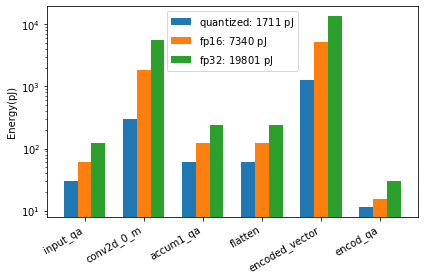

In [202]:
plot_energy_profile([trial_energy_profile,
                    reference_energy_profile_fp16,
                    reference_energy_profile_fp32],labels=['quantized','fp16','fp32'])